In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 1. Membaca dataset
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [12]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (10999, 12)


In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [14]:
# Deteksi duplikat
duplicate_count = df.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_count)

# Deteksi missing values
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values)

# Salin data untuk perbandingan (sebelum cleaning)
df_before = df.copy()


Jumlah baris duplikat: 0
Missing values per kolom:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [15]:
# Hapus duplikat
df_clean = df.drop_duplicates()

# Hapus missing values
df_clean = df_clean.dropna()

In [16]:
# Identifikasi kolom numerik (selain ID)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'ID' in numeric_cols:
    numeric_cols.remove('ID')

# Fungsi untuk menghapus outlier dengan metode IQR
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data yang berada di dalam batas
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Simpan data hasil cleaning untuk perbandingan
df_after = df_clean.copy()
print("Ukuran data setelah cleaning:", df_after.shape)


Ukuran data setelah cleaning: (7971, 12)


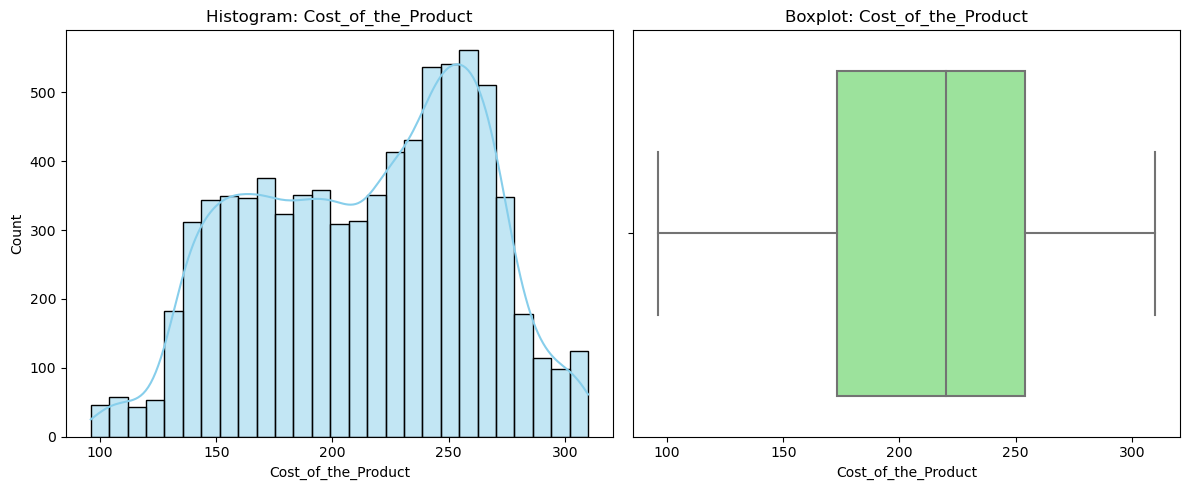

In [22]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_after["Cost_of_the_Product"], kde=True, color='skyblue')
plt.title("Histogram: Cost_of_the_Product")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df_after["Cost_of_the_Product"], color='lightgreen')
plt.title("Boxplot: Cost_of_the_Product")
plt.tight_layout()
plt.show()


In [23]:
# Simpan dataset yang sudah dibersihkan
df_after.to_csv("E-Commerce Shipping Data-CLEANED.csv", index=False)
print("Dataset cleaned telah disimpan sebagai 'E-Commerce Shipping Data-CLEANED.csv'")


Dataset cleaned telah disimpan sebagai 'E-Commerce Shipping Data-CLEANED.csv'


In [24]:
print("Data sebelum cleaning:", df_before.shape)
print("Data setelah cleaning:", df_after.shape)

Data sebelum cleaning: (10999, 12)
Data setelah cleaning: (7971, 12)


In [25]:
# Hitung metrik terukur
profit_total = df_after["Cost_of_the_Product"].sum()
avg_rating = df_after["Customer_rating"].mean()
total_calls = df_after["Customer_care_calls"].sum()

print("Total Profit (Sum Cost_of_the_Product):", profit_total)
print("Rata-rata Customer_rating:", avg_rating)
print("Jumlah Customer_care_calls:", total_calls)

Total Profit (Sum Cost_of_the_Product): 1703293
Rata-rata Customer_rating: 2.9936018065487393
Jumlah Customer_care_calls: 32944


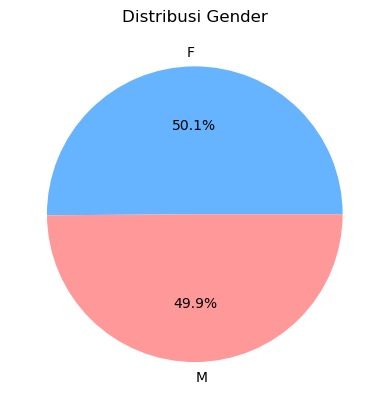

In [26]:
# 1. Pie Chart Jenis Kelamin
gender_counts = df_after["Gender"].value_counts()
plt.figure()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["#66b3ff","#ff9999"])
plt.title("Distribusi Gender")
plt.show()

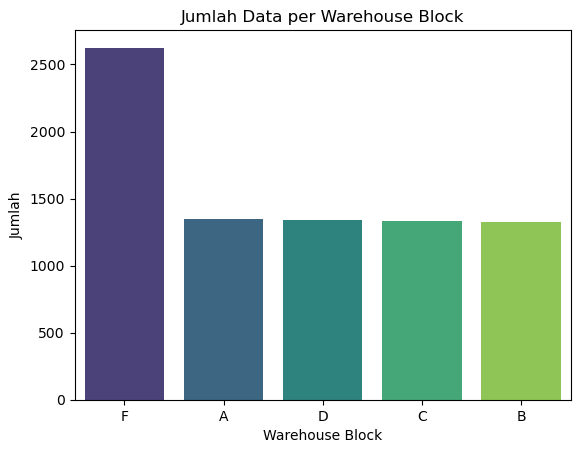

In [27]:
# 2. Bar Chart Warehouse Block (kapasitas penyimpanan)
warehouse_counts = df_after["Warehouse_block"].value_counts()
plt.figure()
sns.barplot(x=warehouse_counts.index, y=warehouse_counts.values, palette="viridis")
plt.title("Jumlah Data per Warehouse Block")
plt.xlabel("Warehouse Block")
plt.ylabel("Jumlah")
plt.show()

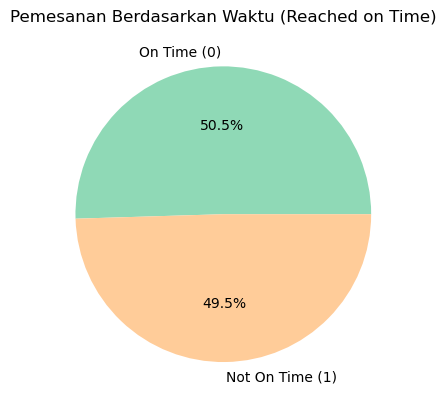

In [29]:
# 3. Pie Chart Pemesanan berdasarkan waktu (Reached on Time)
# Asumsi: 0 = reached on time, 1 = not reached on time
reached_counts = df_after["Reached.on.Time_Y.N"].value_counts()
plt.figure()
plt.pie(reached_counts, labels=["On Time (0)", "Not On Time (1)"], autopct='%1.1f%%', colors=["#8fd9b6","#ffcc99"])
plt.title("Pemesanan Berdasarkan Waktu (Reached on Time)")
plt.show()

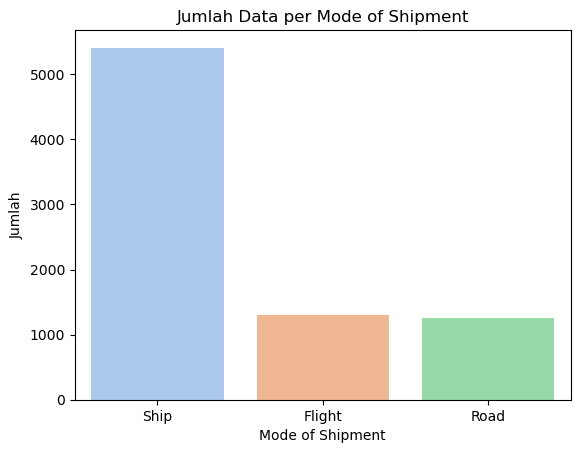

In [31]:
# 4. Bar Chart Mode of Shipment
mode_counts = df_after["Mode_of_Shipment"].value_counts()
plt.figure()
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette="pastel")
plt.title("Jumlah Data per Mode of Shipment")
plt.xlabel("Mode of Shipment")
plt.ylabel("Jumlah")
plt.show()

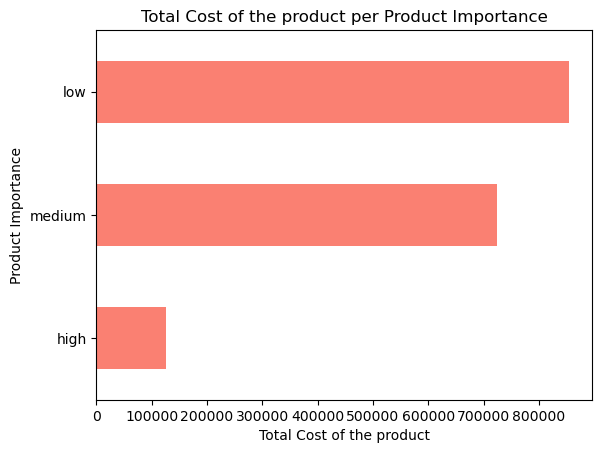

In [34]:
# 5. Horizontal Bar Chart: Sum Cost of the product per Product importance
importance_profit = df_after.groupby("Product_importance")["Cost_of_the_Product"].sum().sort_values()
plt.figure()
importance_profit.plot(kind='barh', color='salmon')
plt.title("Total Cost of the product per Product Importance")
plt.xlabel("Total Cost of the product")
plt.ylabel("Product Importance")
plt.show()

In [ ]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca dataset cleaned
# df = pd.read_csv("E-Commerce Shipping Data-CLEANED.csv")

# # Hitung metrik
# profit_total = df["Cost of the product"].sum()
# avg_rating = df["Customer rating"].mean()
# total_calls = df["Customer care calls"].sum()

# st.title("Dashboard E-Commerce Shipping Data")
# st.markdown("## Metrik Utama")
# st.write("**Total Profit (Sum Cost of the product):**", profit_total)
# st.write("**Rata-rata Customer Rating:**", round(avg_rating,2))
# st.write("**Jumlah Customer Care Calls:**", total_calls)

# # Visualisasi 1: Pie Chart Gender
# st.markdown("## Distribusi Gender")
# fig1, ax1 = plt.subplots()
# gender_counts = df["Gender"].value_counts()
# ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=["#66b3ff","#ff9999"])
# ax1.set_title("Distribusi Gender")
# st.pyplot(fig1)

# # Visualisasi 2: Bar Chart Warehouse Block
# st.markdown("## Warehouse Block")
# fig2, ax2 = plt.subplots()
# warehouse_counts = df["Warehouse block"].value_counts()
# sns.barplot(x=warehouse_counts.index, y=warehouse_counts.values, palette="viridis", ax=ax2)
# ax2.set_title("Jumlah Data per Warehouse Block")
# ax2.set_xlabel("Warehouse Block")
# ax2.set_ylabel("Jumlah")
# st.pyplot(fig2)

# # Visualisasi 3: Pie Chart Reached on Time
# st.markdown("## Reached on Time")
# fig3, ax3 = plt.subplots()
# reached_counts = df["Reached on time"].value_counts()
# ax3.pie(reached_counts, labels=["On Time (0)", "Not On Time (1)"], autopct='%1.1f%%', colors=["#8fd9b6","#ffcc99"])
# ax3.set_title("Pemesanan Berdasarkan Waktu")
# st.pyplot(fig3)

# # Visualisasi 4: Bar Chart Mode of Shipment
# st.markdown("## Mode of Shipment")
# fig4, ax4 = plt.subplots()
# mode_counts = df["Mode of shipment"].value_counts()
# sns.barplot(x=mode_counts.index, y=mode_counts.values, palette="pastel", ax=ax4)
# ax4.set_title("Jumlah Data per Mode of Shipment")
# ax4.set_xlabel("Mode of Shipment")
# ax4.set_ylabel("Jumlah")
# st.pyplot(fig4)

# # Visualisasi 5: Horizontal Bar Chart Product Importance vs. Total Cost
# st.markdown("## Total Cost per Product Importance")
# fig5, ax5 = plt.subplots()
# importance_profit = df.groupby("Product importance")["Cost of the product"].sum().sort_values()
# importance_profit.plot(kind='barh', color='salmon', ax=ax5)
# ax5.set_title("Total Cost of the product per Product Importance")
# ax5.set_xlabel("Total Cost of the product")
# ax5.set_ylabel("Product Importance")
# st.pyplot(fig5)
